In [ ]:
import pandas as pd

data = pd.read_csv("/content/sample_data/AdjustedCleanTapasData.csv")

In [ ]:
my_categories = list(data.groupby(["Category"]).size().index)
my_categories

['Art | Comics',
 'Collaborations',
 'Events | Challenges',
 'Off Topic',
 'Promotions',
 'Questions',
 'Reviews | Feedback',
 'Tech Support | Site Feedback',
 'Writing | Novels']

In [ ]:
from sklearn.model_selection import train_test_split
X = data.Post
y = data.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
post = ["Beginner artist looking for writer for manga"]
y_pred = nb.predict(X_test)
nb.predict

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6005361930294906
                              precision    recall  f1-score   support

                Art | Comics       0.61      0.28      0.39       327
              Collaborations       0.91      0.62      0.73       238
         Events | Challenges       0.81      0.71      0.76       255
                   Off Topic       0.79      0.15      0.25       310
                  Promotions       0.55      0.88      0.67       292
                   Questions       0.42      0.44      0.43       305
          Reviews | Feedback       0.56      0.89      0.69       308
Tech Support | Site Feedback       0.92      0.84      0.88       290
            Writing | Novels       0.40      0.67      0.50       286

                    accuracy                           0.60      2611
                   macro avg       0.66      0.61      0.59      2611
                weighted avg       0.66      0.60      0.58      2611



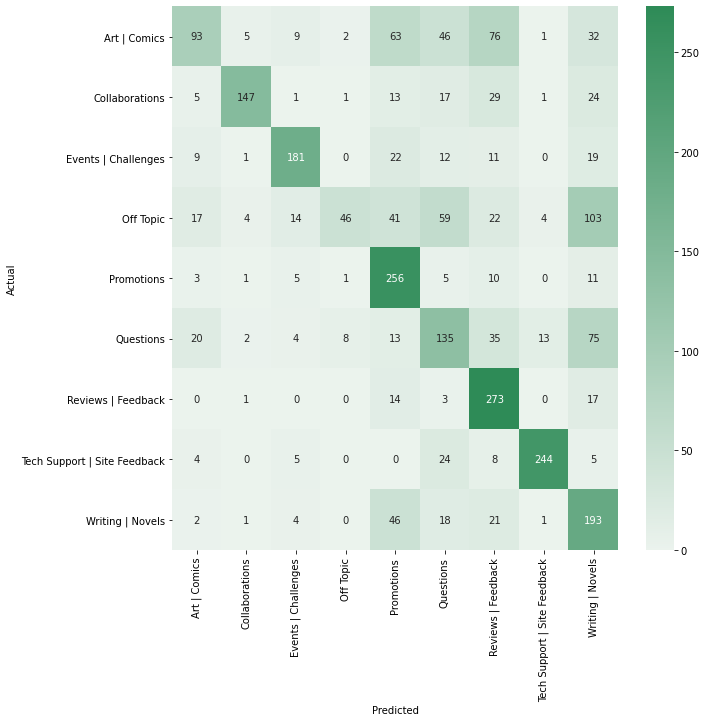

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(conf_mat, annot=True, fmt='d',
           xticklabels=my_categories, yticklabels=my_categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
nb = Pipeline([('vect', CountVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


y_pred = nb.predict(X_test)
nb.predict

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6472615855993872
                              precision    recall  f1-score   support

                Art | Comics       0.55      0.38      0.45       327
              Collaborations       0.87      0.66      0.75       238
         Events | Challenges       0.73      0.84      0.78       255
                   Off Topic       0.67      0.33      0.44       310
                  Promotions       0.67      0.81      0.73       292
                   Questions       0.39      0.51      0.45       305
          Reviews | Feedback       0.71      0.89      0.79       308
Tech Support | Site Feedback       0.92      0.82      0.86       290
            Writing | Novels       0.52      0.65      0.58       286

                    accuracy                           0.65      2611
                   macro avg       0.67      0.66      0.65      2611
                weighted avg       0.66      0.65      0.64      2611



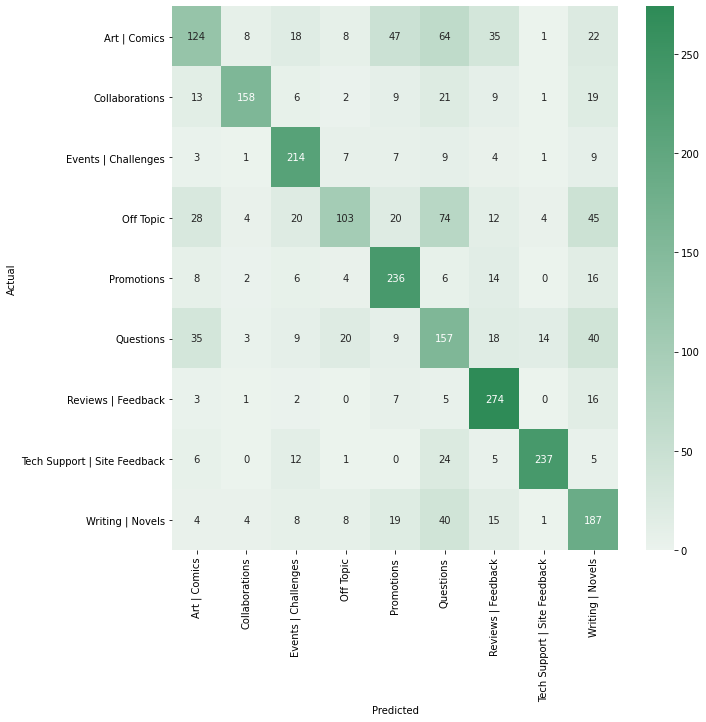

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(conf_mat, annot=True, fmt='d',
           xticklabels=my_categories, yticklabels=my_categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC

lsvc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LinearSVC()),
              ])
lsvc.fit(X_train, y_train)


y_pred = lsvc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.697816928379931
                              precision    recall  f1-score   support

                Art | Comics       0.56      0.46      0.51       327
              Collaborations       0.85      0.90      0.87       238
         Events | Challenges       0.81      0.86      0.84       255
                   Off Topic       0.52      0.49      0.51       310
                  Promotions       0.77      0.75      0.76       292
                   Questions       0.44      0.42      0.43       305
          Reviews | Feedback       0.85      0.86      0.86       308
Tech Support | Site Feedback       0.83      0.94      0.88       290
            Writing | Novels       0.63      0.70      0.66       286

                    accuracy                           0.70      2611
                   macro avg       0.70      0.71      0.70      2611
                weighted avg       0.69      0.70      0.69      2611



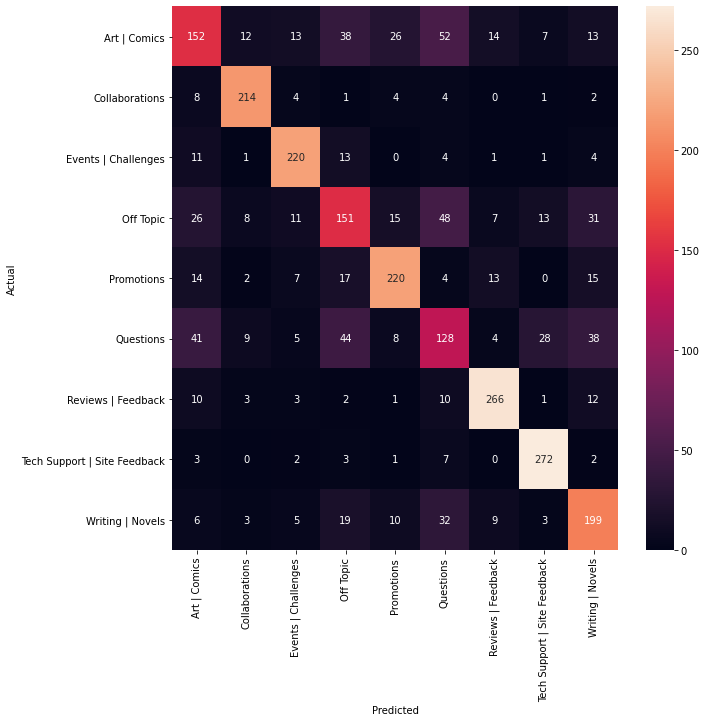

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.svm import SVC
svc = Pipeline([('vect', TfidfVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1311 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6771351972424359
                              precision    recall  f1-score   support

                Art | Comics       0.56      0.45      0.50       327
              Collaborations       0.89      0.83      0.86       238
         Events | Challenges       0.90      0.77      0.83       255
                   Off Topic       0.42      0.58      0.49       310
                  Promotions       0.83      0.73      0.78       292
                   Questions       0.44      0.50      0.47       305
          Reviews | Feedback       0.89      0.75      0.82       308
Tech Support | Site Feedback       0.88      0.87      0.87       290
            Writing | Novels       0.60      0.69      0.64       286

                    accuracy                           0.68      2611
                   macro avg       0.71      0.69      0.69      2611
                weighted avg       0.70      0.68      0.68      2611



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', DecisionTreeClassifier(random_state=0)),
               ])
dtree.fit(X_train, y_train)

y_pred = dtree.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.44887016468785906
                              precision    recall  f1-score   support

                Art | Comics       0.32      0.29      0.30       327
              Collaborations       0.67      0.65      0.66       238
         Events | Challenges       0.52      0.55      0.54       255
                   Off Topic       0.30      0.32      0.31       310
                  Promotions       0.52      0.51      0.51       292
                   Questions       0.20      0.22      0.21       305
          Reviews | Feedback       0.64      0.63      0.64       308
Tech Support | Site Feedback       0.65      0.61      0.63       290
            Writing | Novels       0.33      0.33      0.33       286

                    accuracy                           0.45      2611
                   macro avg       0.46      0.46      0.46      2611
                weighted avg       0.45      0.45      0.45      2611



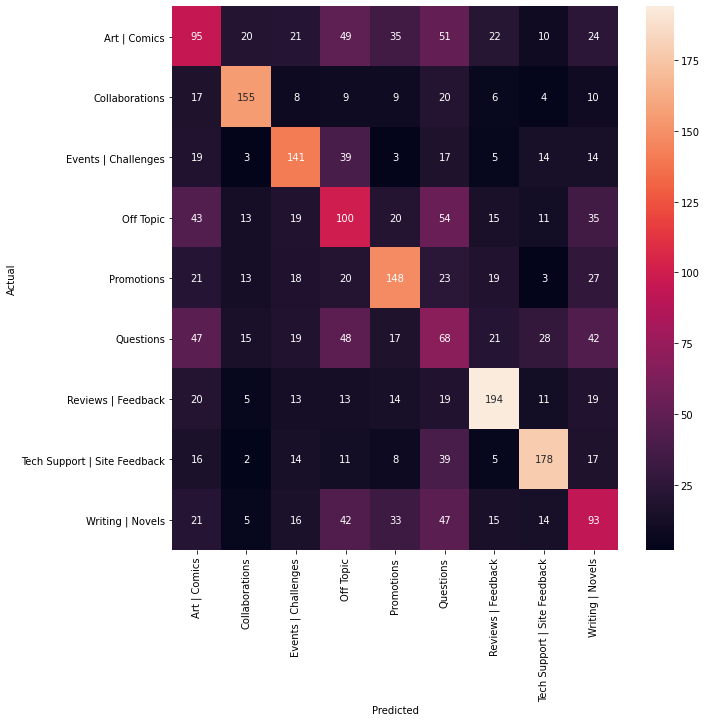

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=500, max_depth=500, random_state=0)),
               ])
rf.fit(X_train, y_train)

y_pred = rf.predict (X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
res1341 = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred,target_names=my_categories))

accuracy 0.6373037150517044
                              precision    recall  f1-score   support

                Art | Comics       0.57      0.33      0.42       327
              Collaborations       0.75      0.90      0.82       238
         Events | Challenges       0.82      0.77      0.80       255
                   Off Topic       0.45      0.45      0.45       310
                  Promotions       0.67      0.78      0.72       292
                   Questions       0.40      0.32      0.36       305
          Reviews | Feedback       0.79      0.81      0.80       308
Tech Support | Site Feedback       0.66      0.97      0.79       290
            Writing | Novels       0.57      0.50      0.53       286

                    accuracy                           0.64      2611
                   macro avg       0.63      0.65      0.63      2611
                weighted avg       0.62      0.64      0.62      2611



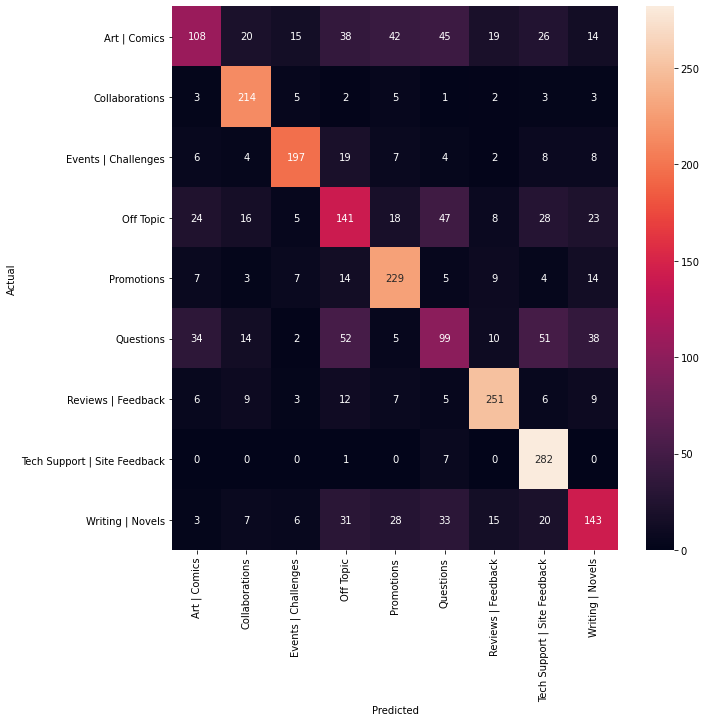

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=my_categories, yticklabels=my_categories, cmap=sns.light_palette("seagreen", as_cmap=True))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()